In [78]:
import pandas as pd
# from datetime import datetime
import numpy
import matplotlib.pyplot as plt

In [79]:
data=pd.read_csv('OnlineRetail.csv',encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [80]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
data['Revenue']=data['Quantity']*data['UnitPrice']
txt_revenue=data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
txt_revenue

,InvoiceYearMonth,Revenue
0,201012.0,742758.820
1,201101.0,553674.540
2,201102.0,492636.260
3,201103.0,678093.000
4,201104.0,488332.991
5,201105.0,717480.910
6,201106.0,686094.980
7,201107.0,676697.211
8,201108.0,678906.680
9,201109.0,1013901.152


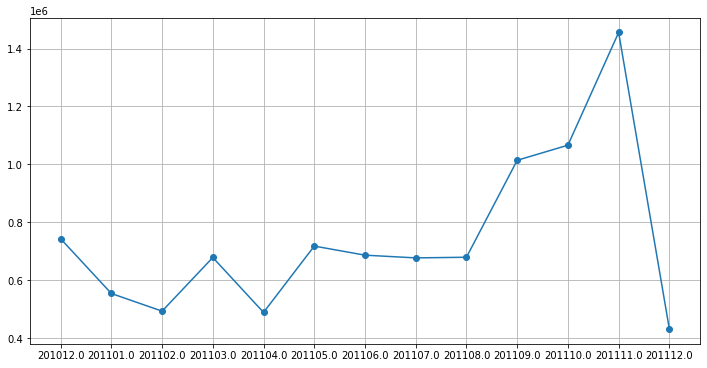

In [81]:
plt.figure(figsize=(12,6))
plt.plot(txt_revenue['InvoiceYearMonth'].to_numpy(dtype=str),txt_revenue['Revenue'],marker='o')
plt.grid()

# Growth Rate

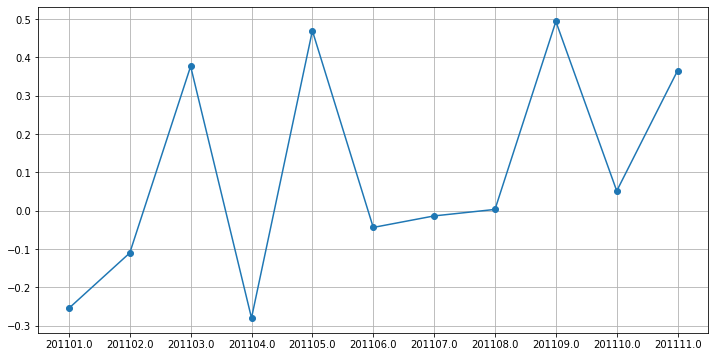

In [82]:
txt_revenue['MonthlyGrowth']=txt_revenue['Revenue'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(txt_revenue.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'].to_numpy(dtype=str),txt_revenue.query('InvoiceYearMonth < 201112')['MonthlyGrowth'],marker='o')
plt.grid()

,InvoiceYearMonth,CustomerID
0,201012.0,870
1,201101.0,684
2,201102.0,714
3,201103.0,922
4,201104.0,817


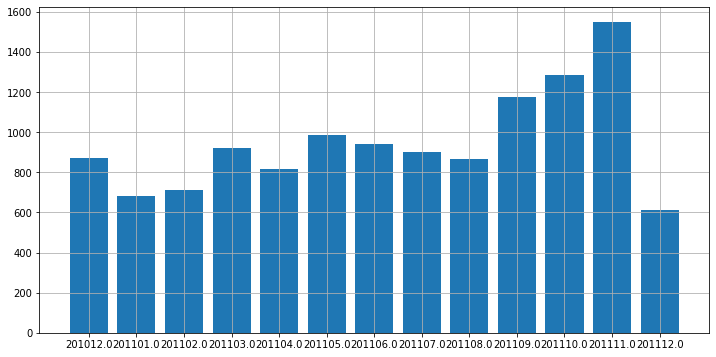

In [83]:

tx_uk=data.query("Country =='United Kingdom'").reset_index(drop=True)
# Monthly Active Customers
tx_monthly_active=tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

plt.figure(figsize=(12,6))
plt.bar(tx_monthly_active['InvoiceYearMonth'].to_numpy(dtype=str),tx_monthly_active['CustomerID'])
plt.grid()
tx_monthly_active.head()

In [84]:
# Monthly Order Count
tx_month_scales=tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
tx_month_scales.head(13)

,InvoiceYearMonth,Quantity
0,201012.0,294305.0
1,201101.0,235404.0
2,201102.0,221731.0
3,201103.0,276552.0
4,201104.0,254141.0
5,201105.0,303200.0
6,201106.0,255897.0
7,201107.0,319908.0
8,201108.0,316844.0
9,201109.0,454669.0


In [85]:
# New Customer Ratio
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012.0,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012.0,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012.0,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012.0,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012.0,20.34,2010-12-01 08:26:00,201012


In [86]:
tx_uk['UserType']='New'
tx_uk.loc[tx_uk['InvoiceYearMonth'] > tx_uk['MinPurchaseYearMonth'],'UserType']='Existing'
tx_uk.head(500)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012.0,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012.0,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012.0,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012.0,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012.0,20.34,2010-12-01 08:26:00,201012,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,571185,85049E,SCANDINAVIAN REDS RIBBONS,12.0,2011-10-14 11:15:00,1.25,13047.0,United Kingdom,201110.0,15.00,2010-12-01 08:34:00,201012,Existing
496,C572491,23245,SET OF 3 REGENCY CAKE TINS,-1.0,2011-10-24 14:02:00,4.95,13047.0,United Kingdom,201110.0,-4.95,2010-12-01 08:34:00,201012,Existing
497,C572491,23198,PANTRY MAGNETIC SHOPPING LIST,-3.0,2011-10-24 14:02:00,1.45,13047.0,United Kingdom,201110.0,-4.35,2010-12-01 08:34:00,201012,Existing
498,C572491,23031,DRAWER KNOB CRACKLE GLAZE PINK,-1.0,2011-10-24 14:02:00,1.65,13047.0,United Kingdom,201110.0,-1.65,2010-12-01 08:34:00,201012,Existing


In [87]:
tx_usertype_revenue= tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
tx_usertype_revenue=tx_usertype_revenue.query('InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112')
tx_usertype_revenue.head(34)

,InvoiceYearMonth,UserType,Revenue
1,201101.0,Existing,193068.490
2,201101.0,New,155303.270
3,201102.0,Existing,218276.530
4,201102.0,New,127076.200
5,201103.0,Existing,294379.460
6,201103.0,New,159409.720
7,201104.0,Existing,265703.010
8,201104.0,New,107673.071
9,201105.0,Existing,431495.310
10,201105.0,New,90377.640


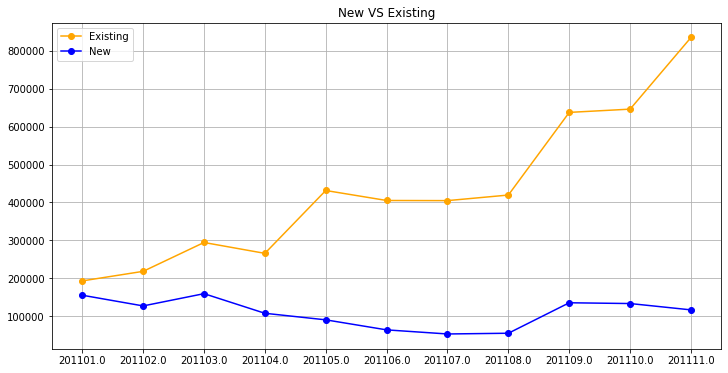

In [88]:
plt.figure(figsize=(12,6))
plt.plot(tx_usertype_revenue.query("UserType=='Existing'")['InvoiceYearMonth'].to_numpy(dtype=str),tx_usertype_revenue.query("UserType=='Existing'")['Revenue'],marker='o',c='orange',label="Existing")
plt.plot(tx_usertype_revenue.query("UserType=='New'")['InvoiceYearMonth'].to_numpy(dtype=str),tx_usertype_revenue.query("UserType== 'New'")['Revenue'],marker='o',c='blue',label="New")
plt.title('New VS Existing')
plt.grid()
plt.legend()

,InvoiceYearMonth,CustomerID
1,201101.0,1.124224
2,201102.0,0.904000
3,201103.0,0.790291
4,201104.0,0.510166
5,201105.0,0.343793
6,201106.0,0.281250
7,201107.0,0.236589
8,201108.0,0.192837
9,201109.0,0.305216
10,201110.0,0.328852


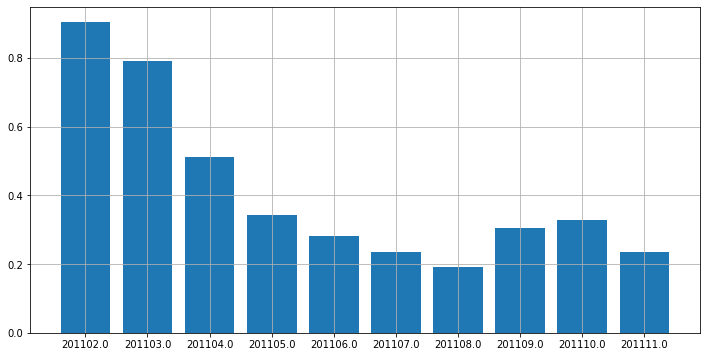

In [89]:
tx_usernew_ratio = tx_uk.query("UserType=='New'").groupby('InvoiceYearMonth')['CustomerID'].nunique() / tx_uk.query("UserType=='Existing'").groupby('InvoiceYearMonth')['CustomerID'].nunique()
tx_usernew_ratio = tx_usernew_ratio.reset_index()
tx_usernew_ratio = tx_usernew_ratio.dropna()


plt.figure(figsize=(12,6))
plt.bar(tx_usernew_ratio.query('InvoiceYearMonth > 201101 and InvoiceYearMonth < 201112')['InvoiceYearMonth'].to_numpy(dtype=str),tx_usernew_ratio.query('InvoiceYearMonth > 201101 and InvoiceYearMonth < 201112')['CustomerID'])
plt.grid()

tx_usernew_ratio.head(13)

# Monthly Retention Rate

In [90]:
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

tx_retention.head(13)

InvoiceYearMonth,CustomerID,201012.0,201101.0,201102.0,201103.0,201104.0,201105.0,201106.0,201107.0,201108.0,201109.0,201110.0,201111.0,201112.0
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
5,12821.0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,12822.0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,12823.0,0,0,1,1,0,0,0,0,1,1,0,0,0
8,12824.0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,12826.0,1,1,0,0,0,0,1,0,0,1,0,1,1


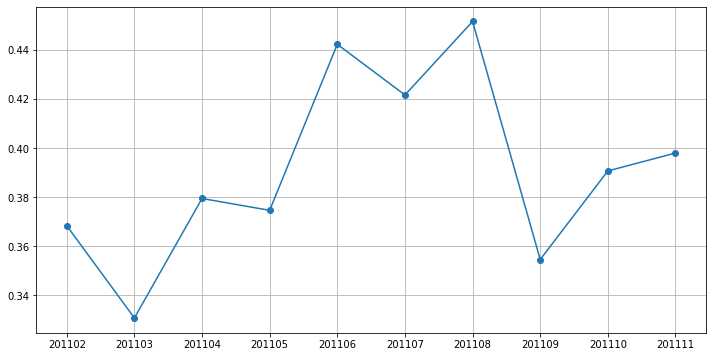

In [91]:
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention.head()

plt.figure(figsize=(12,6))
plt.plot(tx_retention.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'].to_numpy(dtype=str),tx_retention.query('InvoiceYearMonth < 201112')['RetentionRate'],marker='o')
plt.grid()